In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.special as sps

# Exercise Booklet - Q42

## Part 1

## Q1

### Directed Graphical Model

<img src="images/DGM.png">

### Factor Graph

<img src="images/FG.png">

## Q2

Let $P=1.2, \nu=0.4, \beta=0.0016$

$$\phi = p(A,R,x_1=\hat{x_1}|x_0=\hat{x_0}) \propto p(x_1|x_0,A,R)p(A)p(R) \\ = N(x_1;Ax_0,R)N(A;0,P)IG(R;\nu,\nu/\beta)
\\
\propto exp(-\frac{1}{2}\frac{x_1^2}{R}+x_0x_1\frac{A}{R}-\frac{1}{2}\frac{x_0^2A^2}{R}-\frac{1}{2}log2\pi R)\\
exp(-\frac{1}{2}\frac{A^2}{P}-\frac{1}{2}log|2\pi P|)\\
exp(-(\nu+1)logR-\frac{\nu}{\beta}\frac{1}{R}-log\Gamma(\nu)+\nu log(\nu / \beta))
$$

$$log\phi=-\frac{1}{2}\frac{x_1^2}{R}+x_0x_1\frac{A}{R}-\frac{1}{2}\frac{x_0^2A^2}{R}-\frac{1}{2}log2\pi R-\frac{1}{2}\frac{A^2}{P}-\frac{1}{2}log|2\pi P|-(\nu+1)logR-\frac{\nu}{\beta}\frac{1}{R}-log\Gamma(\nu)+\nu log(\nu/\beta)\\
=-\frac{1}{2}\frac{x_1^2}{R}+x_0x_1\frac{A}{R}-\frac{1}{2}\frac{x_0^2A^2}{R}-\frac{1}{2}logR-\frac{1}{2}\frac{A^2}{P}-(\nu+1)logR-\frac{\nu}{\beta}\frac{1}{R}
$$

$$log\phi_A=-\frac{1}{2}\frac{A^2}{P}
\\
log\phi_R=-(\nu+1+1/2)logR-(\frac{\nu}{\beta}+\frac{1}{2}x_1^2)\frac{1}{R}
\\
log\phi_x=x_0x_1\frac{A}{R}-\frac{1}{2}\frac{x_0^2A^2}{R}
$$

## Q3

$$p(A|R,x_0,x_1)\\
=exp(-\frac{1}{2}\frac{A^2}{P}+x_0x_1\frac{A}{R}-\frac{1}{2}\frac{x_0^2A^2}{R})
$$

$$p(R|A,x_0,x_1)\\
=exp(-(\nu+1+1/2)logR-(\frac{\nu}{\beta}+\frac{1}{2}x_1^2)\frac{1}{R}+x_0x_1\frac{A}{R}-\frac{1}{2}\frac{x_0^2A^2}{R})
$$

## Q4

$$p(A,R,x_0=1,x_1=-6)\\
\propto exp(-\frac{1}{2}\frac{(-6)^2}{R}+1*-6\frac{A}{R}-\frac{1}{2}\frac{1^2A^2}{R}-\frac{1}{2}log2\pi R)\\
exp(-\frac{1}{2}\frac{A^2}{P}-\frac{1}{2}log|2\pi P|)\\
exp(-(\nu+1)logR-\frac{\nu}{\beta}\frac{1}{R}-log\Gamma(\nu)+\nu log(\nu / \beta))\\
=exp(-\frac{18}{R}-\frac{6A}{R}-\frac{A^2}{2R}-\frac{1}{2}log2\pi R)\\
exp(-\frac{1}{2}\frac{A^2}{P}-\frac{1}{2}log|2\pi P|)\\
exp(-(\nu+1)logR-\frac{\nu}{\beta}\frac{1}{R}-log\Gamma(\nu)+\nu log(\nu / \beta))\\
$$

In [61]:
P=1.2
nu=0.4
beta=100
x0=1
x1=-6
Z=[]
A = np.linspace(-8,6,100,endpoint=False).tolist()
R = np.linspace(0.0001,0.01,100,endpoint=False).tolist()
R2 = np.linspace(0.01,1,100,endpoint=False).tolist()
R3 = np.linspace(1,100,100,endpoint=False).tolist()
R4 = np.linspace(100,10000,100,endpoint=False).tolist()
R = R + R2 + R3 + R4
for r in R:
    newz=[]
    for a in A:
        k=np.exp(-(x1**2)/(2*r)+x0*x1*a/r-a**2*x0**2/(2*r)-np.log(2*np.pi*r)/2)
        l=np.exp(-(a**2)/(2*P)-np.log(2*np.pi*P)/2)
        m=np.exp(-(nu+1)*np.log(r)-nu/(beta*r)-np.log(sps.gamma(nu))+nu*np.log(nu/beta))
        newz.append(k*l*m)
    Z.append(newz)

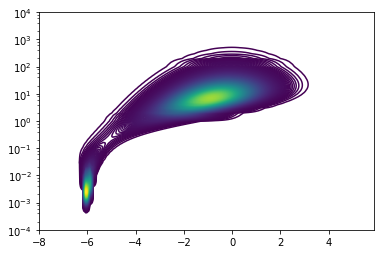

In [62]:
Z=np.array(Z)
plt.contour(A,R,Z,500)
plt.yscale('log')
plt.show()

## Part 2

## Q1

In [63]:
def EM1(R):
    P=1.2
    x0=1
    x1=-6
    nu=0.4
    beta=100
    for i in range(100):
        sig=1/(1/P+x0**2/R)
        mu=sig*x0*x1/R
        
        a=nu+0.5
        b=nu/beta+x1**2/2-x0*x1*mu+x0**2*(mu**2+sig)/2
        
        R=b/(a+1)
    return R

In [64]:
print EM1(.1)

0.00293091809593


## Q2

In [65]:
def EM2(A):
    P=1.2
    x0=1
    x1=-6
    nu=0.4
    beta=100
    for i in range(100):
        a=nu+0.5
        b=nu/beta+x1**2/2-x0*x1*A+x0**2*A**2/2
        
        sig=1/(1/P+x0**2*a/b)
        mu=sig*x0*x1*a/b
        
        A=mu
    return A

In [66]:
print EM2(-7)

-5.97631313914


## Q3

In [2]:
def EM3(R,A):
    P=1.2
    x0=1
    x1=-6
    nu=0.4
    beta=100
    for i in range(100):
        a=nu+0.5
        b=nu/beta+x1**2/2-x0*x1*A+x0**2*A**2/2
        
        R=b/(a+1)
        
        sig=1/(1/P+x0**2/R)
        mu=sig*x0*x1/R
        
        A=mu
    return R,A

In [3]:
print EM3(.1,-7)

(0.0021351492258353828, -5.989343215391994)


## Q4

In [69]:
nu=0.4
beta=100
P=1.2
x0=1
x1=-6
T=300
EA=-6
EA2=EA^2
EinvR=1/0.00001

for i in range(1,T+1):
    sig=1/(1/P+x0**2*EinvR)
    mu=sig*x0*x1*EinvR
    
    EA=mu
    EA2=mu**2+sig
    
    a=nu+0.5
    b=0.5*(x1**2-2*x1*x0*EA+x0**2*EA2)+nu/beta
    
    EinvR=a/b
print EinvR

0.054834719541
